## Imports

In [80]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sqlite3
import tkinter as tk
from tkinter import filedialog
import script_gui
import os

## Functions

### I don't use this function anymore because there are too many records to go through and it is a pain. I kept it here anyways just for your benefit

In [81]:
def fill_missing_values_with_user_choice(df):
    """
    Fill missing values in a DataFrame by allowing the user to choose the statistic (mean, median, mode)
    to use for each column with missing values. Skips columns with all values present or non-numerical data.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None. The function modifies the DataFrame in place by filling missing values.
    """
    for column_name in df.columns:
        if df[column_name].dtypes != 'int64' and df[column_name].dtypes != 'float64':
            print(f"Skipping column '{column_name}' with non-numeric data.")
            print("-" * 50)
            continue

        column_data = df[column_name]
        column_data_without_missing = column_data.dropna()

        if column_data.isna().any():
            # Calculate mean, median, and mode
            mean_val = column_data_without_missing.mean()
            median_val = column_data_without_missing.median()
            mode_array = stats.mode(column_data_without_missing)
            mode_val = mode_array[0][0] if isinstance(mode_array, np.ndarray) and len(mode_array[0]) > 0 else None

            print(f"Column: {column_name}")
            print(f"Mean: {mean_val:.2f}")
            print(f"Median: {median_val:.2f}")
            print(f"Mode: {mode_val}")

            # Ask user for choice of statistic
            choice = input("Choose the statistic to fill missing values (mean, median, mode, none): ").lower().strip()

            # Fill missing values based on user's choice
            if choice == 'mean':
                fill_value = mean_val
            elif choice == 'median':
                fill_value = median_val
            elif choice == 'mode':
                fill_value = mode_val
            elif choice == 'none':
                print("No missing values filled.")
            else:
                while True:
                    print("Invalid choice.")
                    choice = input("Choose the statistic to fill missing values (mean, median, mode, none): ").lower().strip()
                    if choice == 'mean':
                        fill_value = mean_val
                        break
                    elif choice == 'median':
                        fill_value = median_val
                        break
                    elif choice == 'mode':
                        fill_value = mode_val
                        break
                    elif choice == 'none':
                        print("No missing values filled.")
                        break
            df[column_name].fillna(fill_value, inplace=True)
            print(f"Missing values in column '{column_name}' filled with {choice}.")
            print("=" * 50)
            
        else:
            print(f"Skipping column '{column_name}' with no missing data.")
            print("-" * 50)
            continue

    print("Finished replacing numerical values")

In [82]:
def fill_missing_values_with_median(df):
    """
    Fill missing values in a DataFrame using the median for each column with missing values.
    Skips columns with all values present or non-numerical data.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None. The function modifies the DataFrame in place by filling missing values with medians.
    """
    for column_name in df.columns:
        if df[column_name].dtypes != 'int64' and df[column_name].dtypes != 'float64':
            print(f"Skipping column '{column_name}' with non-numeric data.")
            print("-" * 50)
            continue

        column_data = df[column_name]

        if column_data.isna().any():
            median_val = column_data.median()

            print(f"Column: {column_name}")
            print(f"Median: {median_val:.2f}")

            df[column_name].fillna(median_val, inplace=True)
            print(f"Missing values in column '{column_name}' filled with median.")
            print("=" * 50)
            
        else:
            print(f"Skipping column '{column_name}' with no missing data.")
            print("-" * 50)
            continue

    print("Finished replacing numerical values")


## Read the csv files as pandas

In [83]:
tx_antenna_dab = pd.read_csv(r"Data sets/TxAntennaDAB.csv")


In [84]:
tx_antenna_dab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1214 non-null   int64  
 1   NGR                 1214 non-null   object 
 2   Longitude/Latitude  1214 non-null   object 
 3   Site Height         1214 non-null   int64  
 4   In-Use Ae Ht        1214 non-null   int64  
 5   In-Use ERP Total    1210 non-null   object 
 6   Dir Max ERP         852 non-null    float64
 7   0                   1114 non-null   float64
 8   10                  1114 non-null   float64
 9   20                  1114 non-null   float64
 10  30                  1114 non-null   float64
 11  40                  1114 non-null   float64
 12  50                  1114 non-null   float64
 13  60                  1114 non-null   float64
 14  70                  1114 non-null   float64
 15  80                  1114 non-null   float64
 16  90    

In [85]:
fill_missing_values_with_median(tx_antenna_dab)

Skipping column 'id' with no missing data.
--------------------------------------------------
Skipping column 'NGR' with non-numeric data.
--------------------------------------------------
Skipping column 'Longitude/Latitude' with non-numeric data.
--------------------------------------------------
Skipping column 'Site Height' with no missing data.
--------------------------------------------------
Skipping column 'In-Use Ae Ht' with no missing data.
--------------------------------------------------
Skipping column 'In-Use ERP Total' with non-numeric data.
--------------------------------------------------
Column: Dir Max ERP
Median: 190.00
Missing values in column 'Dir Max ERP' filled with median.
Column: 0
Median: 1.50
Missing values in column '0' filled with median.
Column: 10
Median: 1.70
Missing values in column '10' filled with median.
Column: 20
Median: 1.60
Missing values in column '20' filled with median.
Column: 30
Median: 1.50
Missing values in column '30' filled with med

In [86]:
tx_params_dab = pd.read_csv(r"Data sets/TxParamsDAB.csv", encoding='ISO-8859-1')


In [87]:
tx_params_dab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Columns: 138 entries, id to Data SId 15 (Hex)
dtypes: float64(46), int64(1), object(91)
memory usage: 1.3+ MB


In [88]:
fill_missing_values_with_median(tx_params_dab)

Skipping column 'id' with no missing data.
--------------------------------------------------
Skipping column 'Date' with non-numeric data.
--------------------------------------------------
Skipping column 'Ensemble' with non-numeric data.
--------------------------------------------------
Skipping column 'Licence' with non-numeric data.
--------------------------------------------------
Skipping column 'Ensemble Area' with non-numeric data.
--------------------------------------------------
Skipping column 'EID' with non-numeric data.
--------------------------------------------------
Skipping column 'Transmitter Area' with non-numeric data.
--------------------------------------------------
Skipping column 'Site' with non-numeric data.
--------------------------------------------------
Skipping column 'Freq.' with no missing data.
--------------------------------------------------
Skipping column 'Block' with non-numeric data.
--------------------------------------------------
Skipp

c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [89]:
tx_antenna_dab = tx_antenna_dab.merge(tx_params_dab, how='left', on='id')

## Transform the data per the client's requests

In [90]:
# Filter out rows with specific 'NGR' values
ngrs_to_exclude = ['NZ02553847', 'SE213515', 'NT05399374', 'NT25265908']
tx_antenna_dab = tx_antenna_dab[~tx_antenna_dab['NGR'].isin(ngrs_to_exclude)]


In [91]:
tx_antenna_dab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1213
Columns: 182 entries, id to Data SId 15 (Hex)
dtypes: float64(85), int64(3), object(94)
memory usage: 1.7+ MB


In [92]:
# Extract the DAB multiplexes from 'EID' into new columns
dab_multiplexes = ['C18A', 'C18F', 'C188']
for multiplex in dab_multiplexes:
    tx_antenna_dab[multiplex] = tx_antenna_dab['EID'].str.contains(multiplex).astype(int)

In [93]:
# Rename columns and convert 'In-Use Ae Ht' and 'In-Use ERP Total' to numeric values
tx_antenna_dab.rename(columns={'In-Use Ae Ht': 'Aerial height (m)', 'In-Use ERP Total': 'Power (kW)'}, inplace=True)

# Convert columns to string and then perform 'str.replace' and 'astype' operations
tx_antenna_dab['Aerial height (m)'] = tx_antenna_dab['Aerial height (m)'].astype(str).str.replace(',', '').astype(float)
tx_antenna_dab['Power (kW)'] = tx_antenna_dab['Power (kW)'].astype(str).str.replace(',', '').astype(float)



In [94]:
# Convert 'Date' column to datetime type
tx_antenna_dab['Date'] = pd.to_datetime(tx_antenna_dab['Date'])

C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_16964\2143437118.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tx_antenna_dab['Date'] = pd.to_datetime(tx_antenna_dab['Date'])


In [95]:
json_data = tx_antenna_dab.to_json(orient='records')

In [96]:
conn = sqlite3.connect(r'Data sets/full_dataset.db')
cursor = conn.cursor()

In [97]:
cursor.execute('''CREATE TABLE IF NOT EXISTS tx_antenna_dab (data JSON)''')

In [98]:
cursor.execute("INSERT INTO tx_antenna_dab (data) VALUES (?)", (json_data,))


In [99]:
conn.commit()
conn.close()

## Get the mean median and mode

In [100]:
filtered_data = tx_antenna_dab[(tx_antenna_dab['Aerial height (m)'] > 75) & (tx_antenna_dab['Date'] >= pd.to_datetime('2001-01-01'))]


In [101]:
# Step 1: Filter the data for 'Site Height' more than 75 and 'Date' from 2001 onwards
filtered_data = tx_antenna_dab[(tx_antenna_dab['Site Height'] > 75) & (tx_antenna_dab['Date'] >= '2001-01-01')]

# Step 2: Filter the data for each multiplex value (C18A, C18F, C188) within the filtered data
c18a_data = filtered_data[filtered_data['C18A'] == 1]
c18f_data = filtered_data[filtered_data['C18F'] == 1]
c188_data = filtered_data[filtered_data['C188'] == 1]

# Step 3: Extract the 'Power (kW)' values for each multiplex within the filtered data
c18a_power_values = c18a_data['Power (kW)'].dropna().astype(float)
c18f_power_values = c18f_data['Power (kW)'].dropna().astype(float)
c188_power_values = c188_data['Power (kW)'].dropna().astype(float)

# Step 4: Calculate the mean, median, and mode for each set of 'Power (kW)' values
mean_c18a = c18a_power_values.mean()
median_c18a = c18a_power_values.median()
mode_c18a = stats.mode(c18a_power_values).mode[0]

mean_c18f = c18f_power_values.mean()
median_c18f = c18f_power_values.median()
mode_c18f = stats.mode(c18f_power_values).mode[0]

mean_c188 = c188_power_values.mean()
median_c188 = c188_power_values.median()
mode_c188 = stats.mode(c188_power_values).mode[0]

# Display the results
print("C18A Data:")
print("Mean:\t", mean_c18a)
print("Median:\t", median_c18a)
print("Mode:\t", mode_c18a)

print("\nC18F Data:")
print("Mean:\t", mean_c18f)
print("Median:\t", median_c18f)
print("Mode:\t", mode_c18f)

print("\nC188 Data:")
print("Mean:\t", mean_c188)
print("Median:\t", median_c188)
print("Mode:\t", mode_c188)


C18A Data:
Mean:	 0.68610925
Median:	 0.8586185
Mode:	 0.0272

C18F Data:
Mean:	 2.3257456666666667
Median:	 1.0
Mode:	 0.977237

C188 Data:
Mean:	 0.4999998
Median:	 0.3
Mode:	 0.3


C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_16964\4286968680.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_c18a = stats.mode(c18a_power_values).mode[0]
C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_16964\4286968680.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False

## Visualisation


In [102]:
# Prepare the data for DAB multiplexes
column_data = ['Site', 'Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ','Serv Label10 ']

dab_multiplex_data = tx_antenna_dab[column_data]



In [103]:
for column in column_data:
    print('\n\n\n', column)
    print(dab_multiplex_data[column].unique())




 Site
['Durris' 'Meldrum' 'Mormond Hill DAB' 'Redmoss' 'Brown Carrick Hill'
 'DARVEL' 'GIRVAN' 'WEST KILBRIDE' 'Basingstoke' 'Aberdare' 'Abergavenny'
 'Abertillery' 'Acklam Wold' 'Ainley Top' 'Aldeburgh' 'Alexandra Palace'
 'Alsagers Bank' 'ALTON' 'Amlwch Nebo' 'Angus' 'Ardovie Quarry' 'Arfon'
 'ARMAGH' 'ASHBOURNE' 'ASHBURTON' 'Athelstaneford' 'Aylesbury ATE' 'BALA'
 'Balgownie' 'Ballycastle Forest' 'BAMPTON' 'Bangor' 'Barrow'
 'BARSKEOCH HILL' 'Bath' 'Beacon Hill North' 'Beccles South Road'
 'Beecroft Hill' 'BEER' 'Belmont' 'Ben Gullipen' 'Betws Y Coed' 'BIGGAR'
 'Bilsdale - Station Tower' 'Bincombe Hill' 'BIRCH VALE'
 'Blackpool Princess Street' 'Blaenplwyf' 'Bluebell Hill (TV)' 'Blunsdon'
 'Blythburgh Water Tower' 'Boars Hill C' 'BOLEHILL' 'Boston Wyberton'
 'Bow Brickhill' 'Braid Hills' 'Braintree Grid' 'Brandon E' 'Brecon VHF'
 'Bressay' 'Bridport' 'BRIXHAM' 'BROMSGROVE' 'Brougher Mountain'
 'Broughton Moor' 'BT Tower' 'Buckton Barn' 'Bude' 'BUDLEIGH SALTERTON'
 'Bungay Manor F

In [104]:
dab_multiplex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1213
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           1208 non-null   object 
 1   Freq.          1208 non-null   float64
 2   Block          1208 non-null   object 
 3   Serv Label1    1206 non-null   object 
 4   Serv Label2    1206 non-null   object 
 5   Serv Label3    1206 non-null   object 
 6   Serv Label4    1202 non-null   object 
 7   Serv Label10   1031 non-null   object 
dtypes: float64(1), object(7)
memory usage: 117.2+ KB


### Create a directory to save the images

In [105]:

    images_dir = "visualization_images"
    if not os.path.exists(images_dir):
        os.makedirs(images_dir)

### Create and save each graph as a separate image

In [106]:
sns.set(style="whitegrid")  # Set the style for all plots

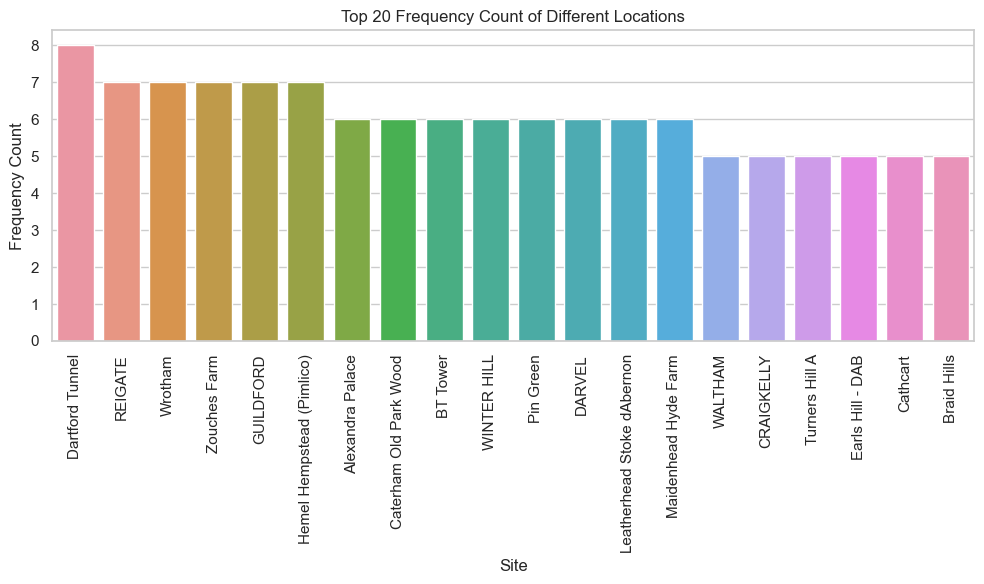

In [107]:
# Specify the number of top locations you want to display
n_top_locations = 20

# Get the top N locations and their counts
top_locations = dab_multiplex_data['Site'].value_counts().head(n_top_locations)

# Create a barchart
plt.figure(figsize=(10, 6))
sns.countplot(data=dab_multiplex_data, x='Site', order=top_locations.index)
plt.xticks(rotation=90)
plt.xlabel('Site')
plt.ylabel('Frequency Count')
plt.title(f'Top {n_top_locations} Frequency Count of Different Locations')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, f'top_{n_top_locations}_frequency_count.png'))
plt.show()

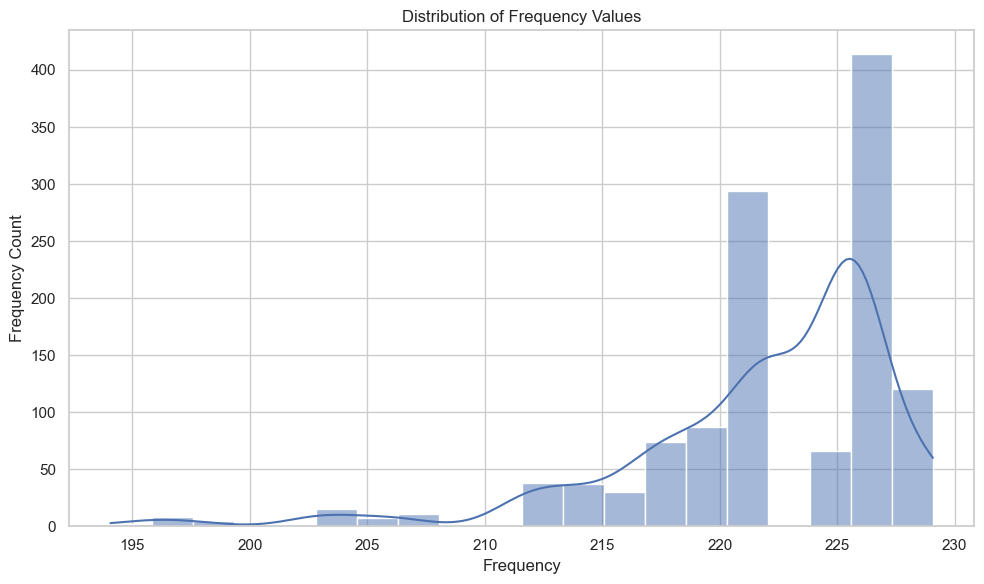

In [108]:
# Distribution of Frequency Values
plt.figure(figsize=(10, 6))
sns.histplot(data=dab_multiplex_data, x='Freq.', bins=20, kde=True)
plt.xlabel('Frequency')
plt.ylabel('Frequency Count')
plt.title('Distribution of Frequency Values')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'frequency_distribution.png'))
plt.show()


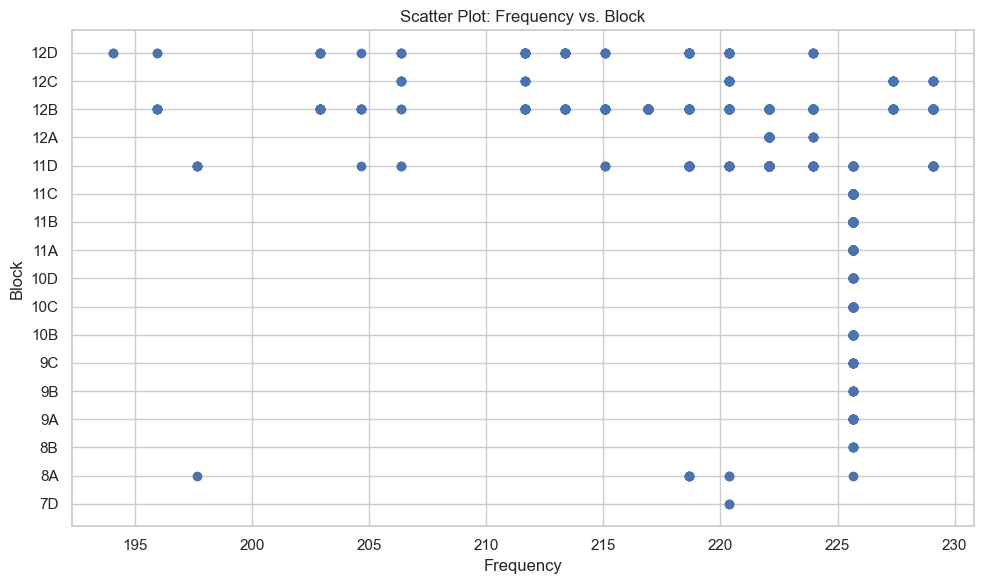

In [109]:
# Scatter Plot: Frequency vs. Block
plt.figure(figsize=(10, 6))
sorted_blocks = sorted(dab_multiplex_data['Block'], key=lambda block: (int(block[:-1]), block[-1]))
plt.scatter(dab_multiplex_data['Freq.'], sorted_blocks)
plt.xlabel('Frequency')
plt.ylabel('Block')
plt.title('Scatter Plot: Frequency vs. Block')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'scatter_plot.png'))
plt.show()

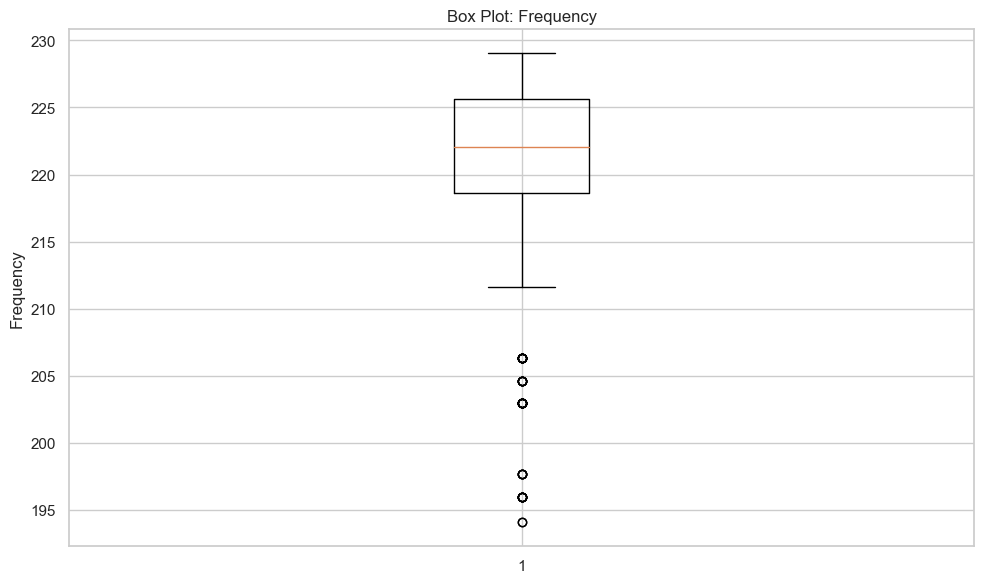

In [110]:
# Boxplot: frequency of frequency
plt.figure(figsize=(10, 6))
plt.boxplot(dab_multiplex_data['Freq.'])
plt.ylabel('Frequency')
plt.title('Box Plot: Frequency')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'boxplot.png'))
plt.show()

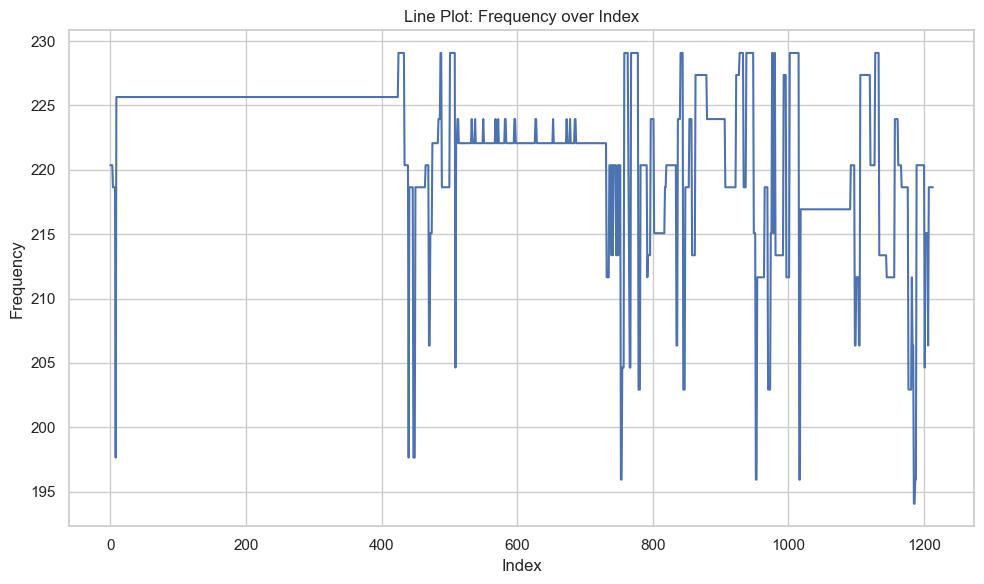

In [111]:
# Line plot: Frequency over index
plt.figure(figsize=(10, 6))
plt.plot(dab_multiplex_data['Freq.'])
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Line Plot: Frequency over Index')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'line_plot.png'))
plt.show()

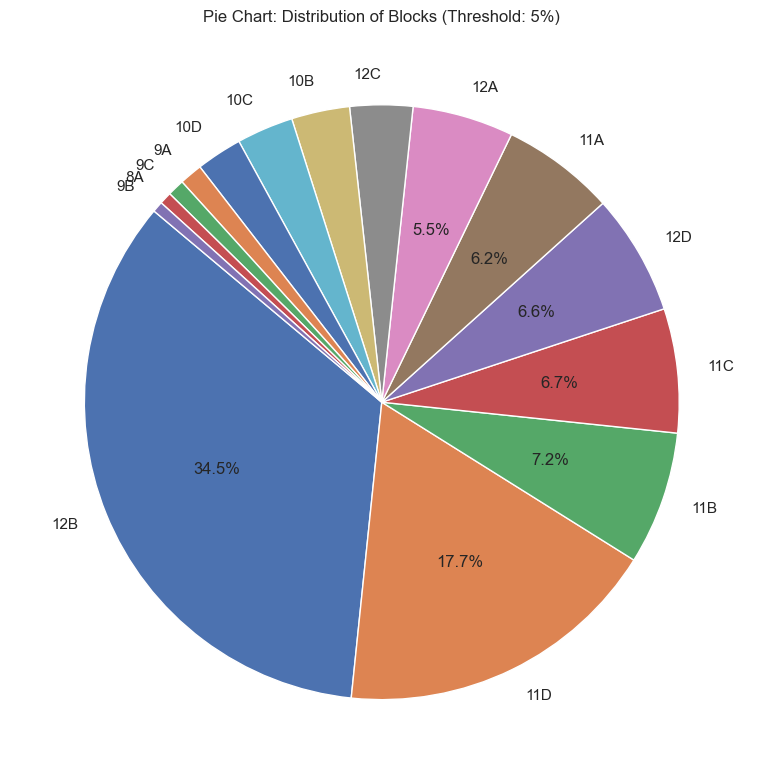

In [112]:
# Calculate the value counts for each block
block_value_counts = dab_multiplex_data['Block'].value_counts()

# Set a threshold for the percentage value to show
percentage_threshold = 5  # Only show percentage for slices above 5%

# Filter blocks that meet the threshold
filtered_blocks = block_value_counts[block_value_counts > percentage_threshold]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_blocks, labels=filtered_blocks.index, autopct=lambda p: '{:.1f}%'.format(p) if p > percentage_threshold else '', startangle=140)
plt.title(f'Pie Chart: Distribution of Blocks (Threshold: {percentage_threshold}%)')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, f'pie_chart.png'))
plt.show()

In [113]:
# Create a copy of the original DataFrame to avoid modifying the original data
dab_multiplex_data_encoded = tx_antenna_dab[['Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 'Serv Label10 ']]

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in dab_multiplex_data_encoded.columns:
    if dab_multiplex_data_encoded[column].dtype == 'object':
        dab_multiplex_data_encoded[column] = label_encoder.fit_transform(dab_multiplex_data_encoded[column].astype(str))

C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_16964\3194178927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dab_multiplex_data_encoded[column] = label_encoder.fit_transform(dab_multiplex_data_encoded[column].astype(str))
C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_16964\3194178927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dab_multiplex_data_encoded[column] = label_encoder.fit_transform(dab_multiplex_data_encoded[column].astype(str))
C:\Users\RuyZambrano\AppData\Local\Temp\ipykerne

In [114]:
correlation_matrix = dab_multiplex_data_encoded.corr()

In [115]:
print(correlation_matrix)

                  Freq.     Block  Serv Label1   Serv Label2   Serv Label3    
Freq.          1.000000  0.259088     -0.385599     -0.352095     -0.320848  \
Block          0.259088  1.000000     -0.309555     -0.302473     -0.350359   
Serv Label1   -0.385599 -0.309555      1.000000      0.673775      0.410394   
Serv Label2   -0.352095 -0.302473      0.673775      1.000000      0.170921   
Serv Label3   -0.320848 -0.350359      0.410394      0.170921      1.000000   
Serv Label4   -0.393224 -0.319065      0.473568      0.448666      0.625991   
Serv Label10  -0.489411 -0.347333      0.508110      0.579346      0.422779   

               Serv Label4   Serv Label10   
Freq.             -0.393224      -0.489411  
Block             -0.319065      -0.347333  
Serv Label1        0.473568       0.508110  
Serv Label2        0.448666       0.579346  
Serv Label3        0.625991       0.422779  
Serv Label4        1.000000       0.584817  
Serv Label10       0.584817       1.000000  


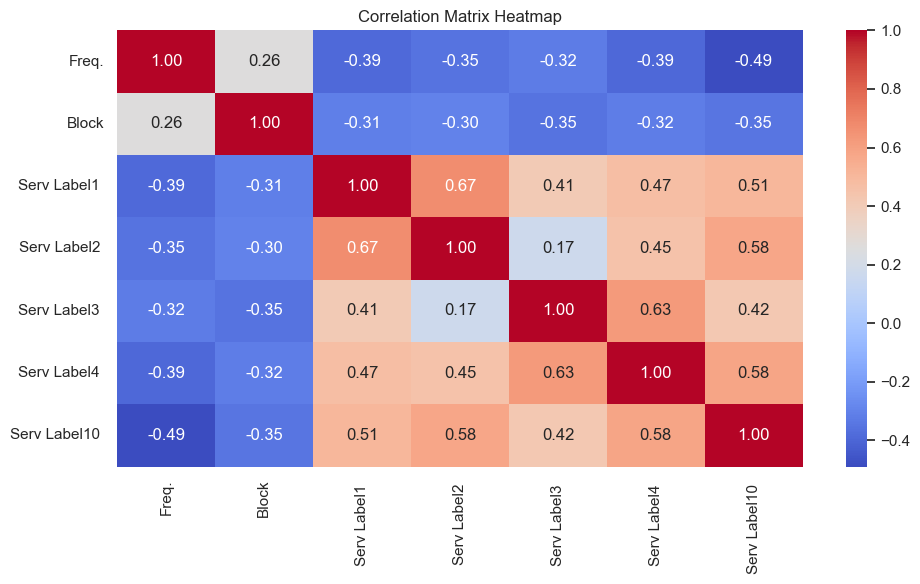

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'correlation_matrix_heatmap.png'))
plt.show()

## Use Tkinter as a GUI instead of Jupyter

In [117]:
script_gui.create_gui()